# Задания с использованием библиотеки Pandas

1. Загрузите датасет Titanic и выведите первые 10 строк. Проверьте типы данных для каждой колонки, есть ли пропущенные значения, и определите размер датасета.

Подсказка: DataFrame считывается, как обычный csv файл. В скобках нужно будет указать переменную url вместо 'название_файла.csv'

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.shape

(891, 12)

2. Найдите количество пропущенных значений в колонке 'Age'. Заполните пропуски в 'Age' средним возрастом и убедитесь, что пропущенных данных больше нет.

In [15]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


3. Создайте новую колонку 'FamilySize', которая вычисляет количество членов семьи пассажира (складывая колонки 'SibSp' и 'Parch'). Выведите первых 10 строк с новой колонкой.

In [22]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
5,0,0,0
6,0,0,0
7,3,1,4
8,0,2,2
9,1,0,1


4. Посчитайте минимальный, максимальный возраст пассажиров, а также минимальную и максимальную цену билета (Fare) для каждой группы пассажиров по полу ('Sex') и классу ('Pclass').

In [54]:
grouped = df.groupby(['Sex', 'Pclass'])[['Age', 'Fare']].agg(['min', 'max'])
grouped

Age           Fare          
                min   max      min       max
Sex    Pclass                               
female 1       2.00  63.0  25.9292  512.3292
       2       2.00  57.0  10.5000   65.0000
       3       0.75  63.0   6.7500   69.5500
male   1       0.92  80.0   0.0000  512.3292
       2       0.67  70.0   0.0000   73.5000
       3       0.42  74.0   0.0000   69.5500

5. Выведите всех пассажиров, чей возраст больше 50 лет и кто путешествовал в первом классе.

In [32]:
older_first_class = df[(df['Age'] > 50) & (df['Pclass'] == 1)]
older_first_class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,1
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C,1
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,0
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,0
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,0


6. Вычислите процент выживших пассажиров в зависимости от пола ('Sex') и класса ('Pclass') до 2ух знаков после запятой. Выведите результат в виде таблицы. 

In [42]:
survival_rate = round(df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100, 2)
survival_rate

Sex     Pclass
female  1         96.81
        2         92.11
        3         50.00
male    1         36.89
        2         15.74
        3         13.54
Name: Survived, dtype: float64

7. Удалите колонку 'Cabin', так как она содержит слишком много пропущенных значений. Убедитесь, что колонка удалена.

In [45]:
df.drop('Cabin', axis=1, inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize'],
      dtype='object')

8. Отсортируйте данные по возрасту пассажиров в порядке убывания и выведите первые 10 строк отсортированного датасета.

In [48]:
sorted_df = df.sort_values(by='Age', ascending=False)
sorted_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,0
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S,0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,0
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C,0
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q,0
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S,0
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S,2
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S,0
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,S,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C,1


9. Создайте сводную таблицу, которая покажет среднюю стоимость билета (Fare) и возраст (Age) для пассажиров по полу и классу.

In [50]:
pivot_table = df.pivot_table(index='Sex', columns='Pclass', values=['Fare', 'Age'], aggfunc='mean')
pivot_table

Age                              Fare                      
Pclass          1          2          3           1          2          3
Sex                                                                      
female  34.141405  28.748661  24.068493  106.125798  21.970121  16.118810
male    39.287717  30.653908  27.372153   67.226127  19.741782  12.661633

10. Преобразуйте колонку 'Name', чтобы извлечь статус (например, 'Mr.', 'Mrs.', 'Miss.') для каждого пассажира и добавьте новую колонку 'Title'. Выведите 5 строк с новой колонкой.

In [57]:
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df[['Name', 'Title']].head(10)

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


# Задания с использованием библиотеки Matplotlib

11. Постройте гистограмму распределения возраста пассажиров с 20 интервалами. Выведите название таблицы "Распределение возраста пассажиров", а также названия оси X "Возраст" и оси Y "Количество пассажиров". 

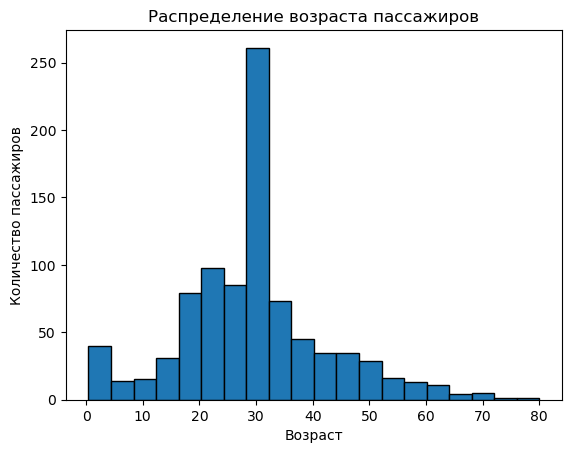

In [64]:
import matplotlib.pyplot as plt

plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

12. Постройте диаграмму рассеяния, чтобы отобразить связь между возрастом пассажира и стоимостью его билета. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

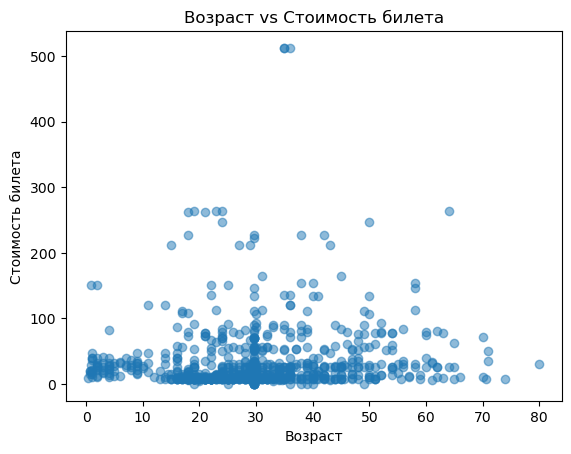

In [66]:
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Возраст vs Стоимость билета')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.show()

13. Постройте столбчатую диаграмму, отображающую количество выживших и погибших пассажиров в зависимости от пола. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

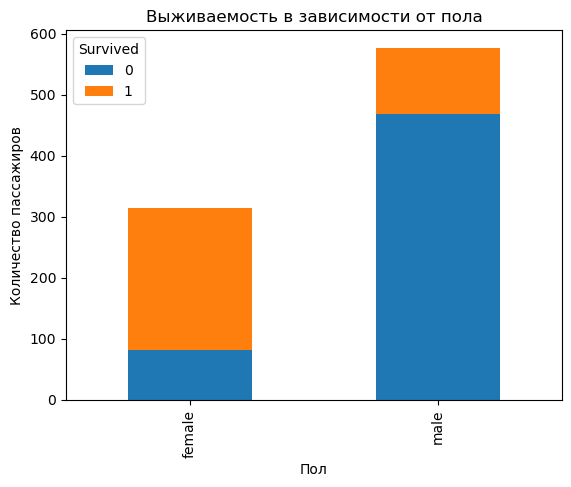

In [69]:
survival_sex = df.groupby('Sex')['Survived'].value_counts().unstack()
survival_sex.plot(kind='bar', stacked=True)
plt.title('Выживаемость в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.show()

14. Постройте круговую диаграмму, которая отобразит процент выживших и погибших пассажиров. Сделайте необходимые подписи, дайте название диаграмме и выведите их. Доля погибших пассажиров должна быть - **красной**, а выживших - **зеленой**. Также выведите проценты внутри долей!

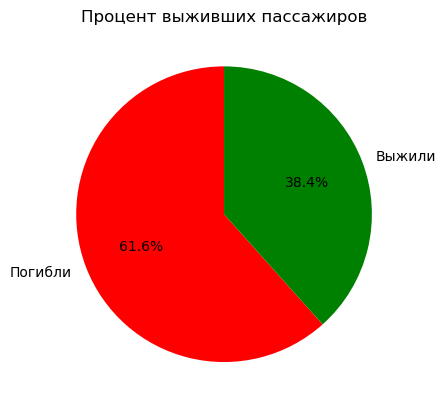

In [73]:
survived_counts = df['Survived'].value_counts()
plt.pie(survived_counts, labels=['Погибли', 'Выжили'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Процент выживших пассажиров')
plt.show()

15. Постройте диаграмму boxplot для распределения стоимости билетов с разбивкой по классам пассажиров. Уберите автоматический заголовок и выведите свой заголовок с подписанными осями.

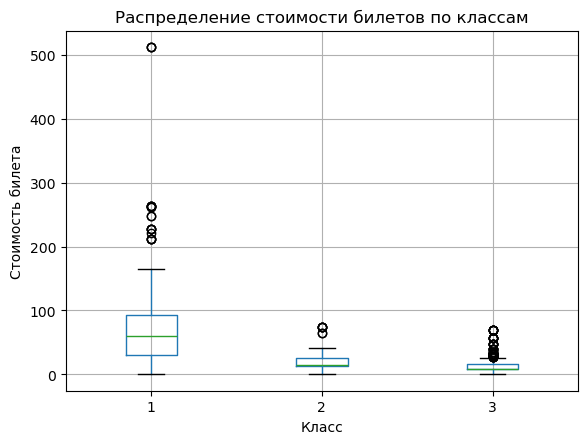

In [80]:
df.boxplot(column='Fare', by='Pclass')
plt.title('Распределение стоимости билетов по классам')
plt.suptitle('') 
plt.xlabel('Класс')
plt.ylabel('Стоимость билета')
plt.show()

16. Постройте линейный график, отображающий количество пассажиров в зависимости от их возраста (сгруппированного по 5 лет). Дайте подходящее название графику, подпишите оси!

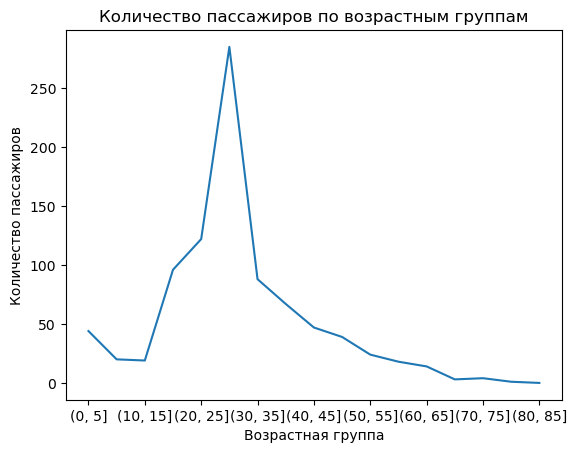

In [82]:
df['AgeGroup'] = pd.cut(df['Age'], bins=range(0, 90, 5))
age_group_counts = df['AgeGroup'].value_counts().sort_index()
age_group_counts.plot(kind='line')
plt.title('Количество пассажиров по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пассажиров')
plt.show()

17. Постройте гистограмму, отображающую распределение количества членов семьи у пассажиров. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

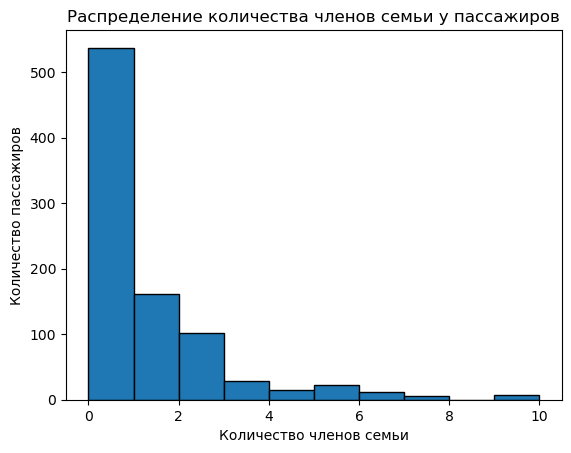

In [86]:
plt.hist(df['FamilySize'], bins=10, edgecolor='black')
plt.title('Распределение количества членов семьи у пассажиров')
plt.xlabel('Количество членов семьи')
plt.ylabel('Количество пассажиров')
plt.show()

18. Постройте многослойную столбчатую диаграмму, отображающую выживаемость пассажиров по классам с разбивкой по полу. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

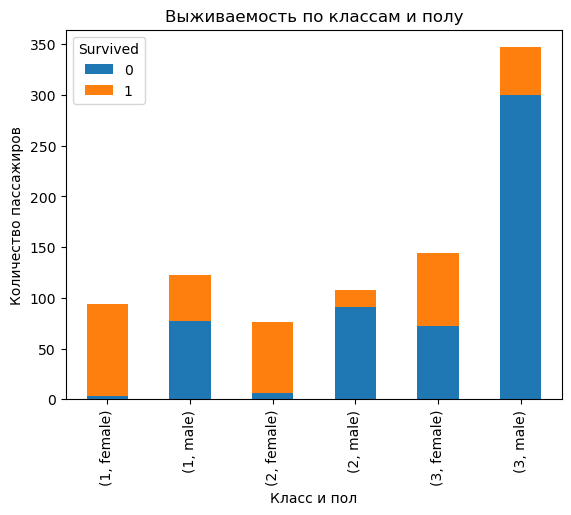

In [89]:
survived_class_sex = df.groupby(['Pclass', 'Sex'])['Survived'].value_counts().unstack()
survived_class_sex.plot(kind='bar', stacked=True)
plt.title('Выживаемость по классам и полу')
plt.xlabel('Класс и пол')
plt.ylabel('Количество пассажиров')
plt.show()


19. Постройте столбчатую диаграмму, отображающую средний возраст выживших и погибших пассажиров. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

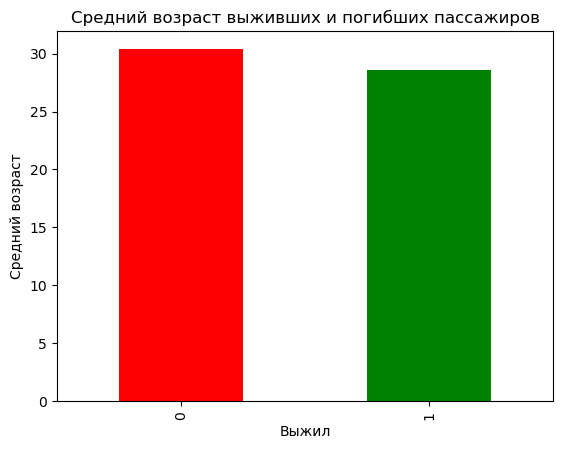

In [96]:
avg_age_survival = df.groupby('Survived')['Age'].mean()
avg_age_survival.plot(kind='bar', color=['red', 'green'])
plt.title('Средний возраст выживших и погибших пассажиров')
plt.xlabel('Выжил')
plt.ylabel('Средний возраст')
plt.show()

20. Постройте столбчатую диаграмму, отображающую количество пассажиров, отправившихся из каждого порта (колонка 'Embarked'). Отобразите порты 'C' (Cherbourg) - желтый цвет, 'Q' (Queenstown) - зеленый цвет, и 'S' (Southampton) - синий цвет. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!


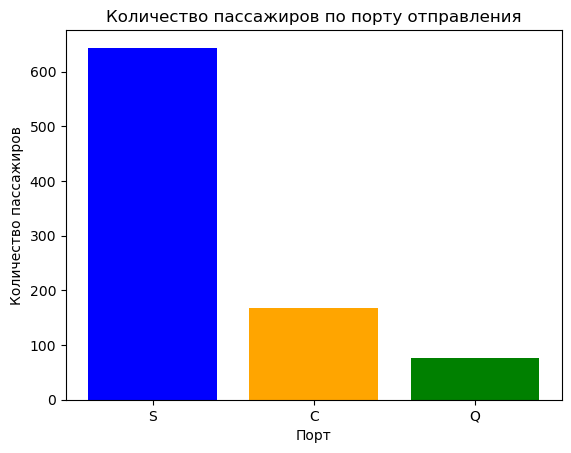

In [98]:
# Подсчет количества пассажиров по портам
embarked_counts = df['Embarked'].value_counts()

# Построение столбчатой диаграммы
plt.bar(embarked_counts.index, embarked_counts.values, color=['blue', 'orange', 'green'])
plt.title('Количество пассажиров по порту отправления')
plt.xlabel('Порт')
plt.ylabel('Количество пассажиров')
plt.show()

# Задания с использованием библиотеки Seaborn

21. Постройте тепловую карту (heatmap) для отображения корреляции между **числовыми** признаками датасета. Дайте и выведите название этой матрицы!

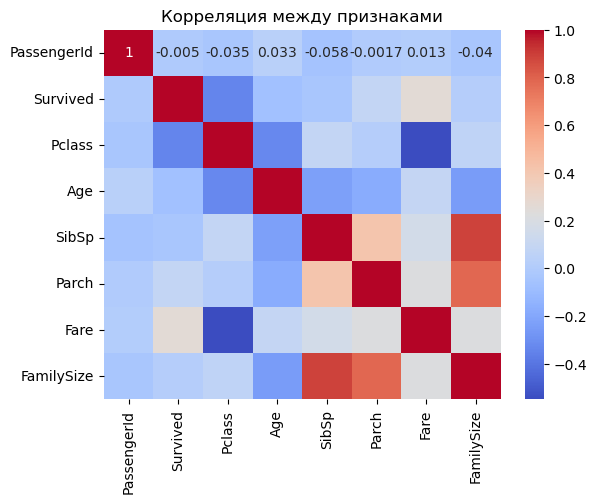

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Оставляем только числовые столбцы
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Вычисление корреляционной матрицы
corr_matrix = numeric_df.corr()

# Построение heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между признаками')
plt.show()

22. Постройте jointplot, отображающий диаграмму рассеяния возраста и стоимости билета с плотностями распределения по осям. Подпишите оси!

F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


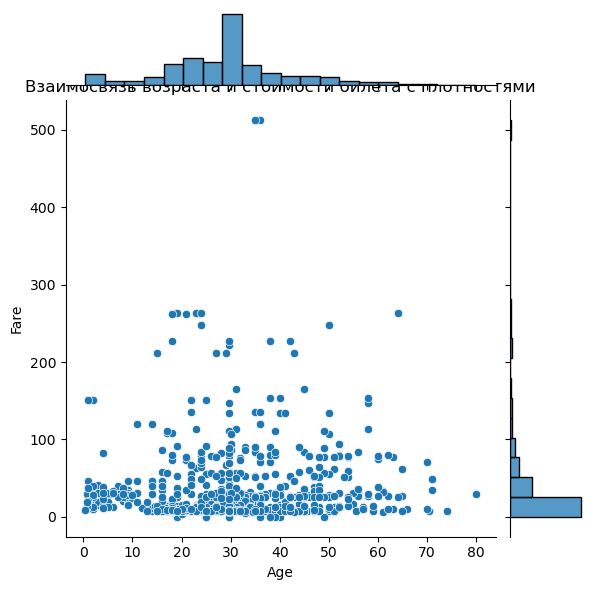

In [110]:
sns.jointplot(x='Age', y='Fare', data=df, kind='scatter', marginal_kws=dict(bins=20, fill=True))
plt.title('Взаимосвязь возраста и стоимости билета с плотностями')
plt.show()

23. Постройте swarmplot, чтобы отобразить возраст пассажиров в зависимости от класса. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 1

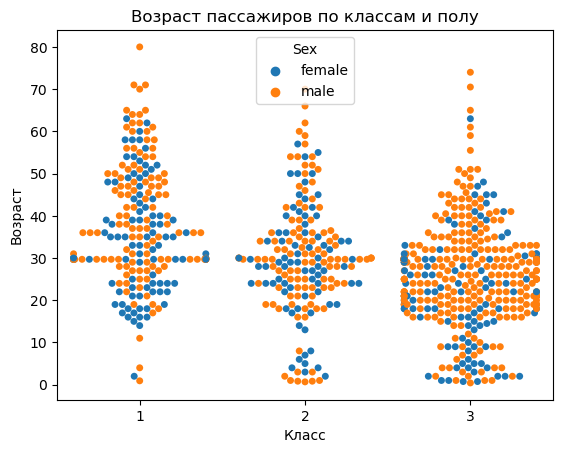

In [113]:
sns.swarmplot(x='Pclass', y='Age', data=df, hue='Sex')
plt.title('Возраст пассажиров по классам и полу')
plt.xlabel('Класс')
plt.ylabel('Возраст')
plt.show()

24. Постройте сетку графиков с помощью FacetGrid для отображения распределения стоимости билета с разбивкой по полу и порту отправления. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

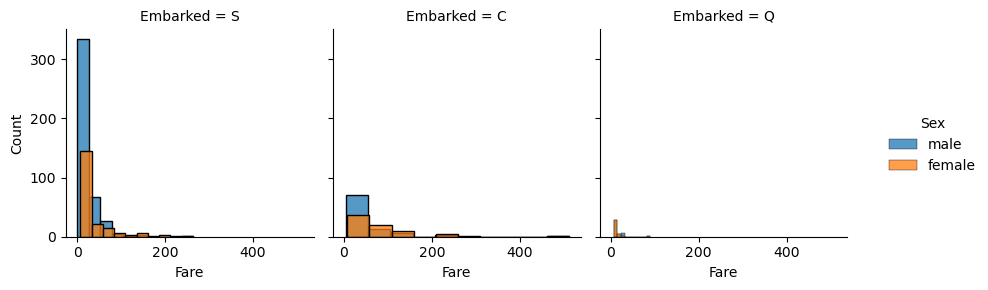

In [116]:
g = sns.FacetGrid(df, col="Embarked", hue="Sex", margin_titles=True)
g.map(sns.histplot, "Fare", bins=10)
g.add_legend()
plt.show()

25. Постройте barplot, который отобразит медианную стоимость билетов с разбивкой по полу и порту отправления. В библиотеке Seaborn можно использовать numpy.median, чтобы задать функцию для estimator. Не забудьте импортировать numpy! Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

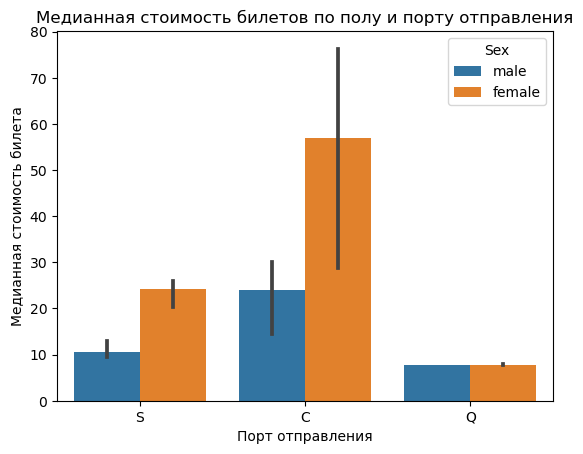

In [123]:
import numpy as np
# Построение barplot с медианой стоимости билетов
sns.barplot(x='Embarked', y='Fare', hue='Sex', data=df, estimator=np.median)
plt.title('Медианная стоимость билетов по полу и порту отправления')
plt.xlabel('Порт отправления')
plt.ylabel('Медианная стоимость билета')
plt.show()

26. Постройте pointplot, чтобы показать, как изменяется вероятность выживания в зависимости от пола и класса. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

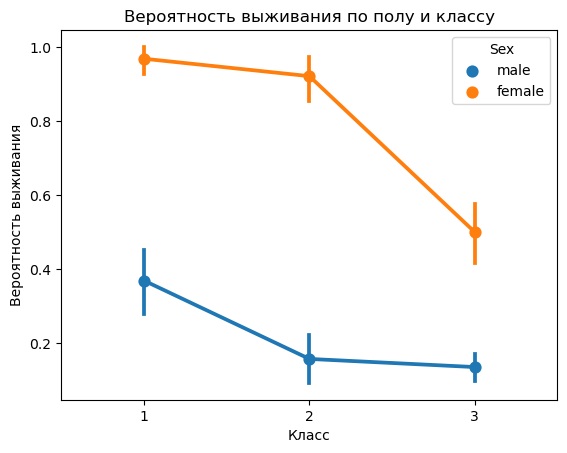

In [129]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Вероятность выживания по полу и классу')
plt.xlabel('Класс')
plt.ylabel('Вероятность выживания')
plt.show()

27. Постройте pairplot для числовых признаков (например, возраста, стоимости билета, количества членов семьи) с разделением по полу. 

F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

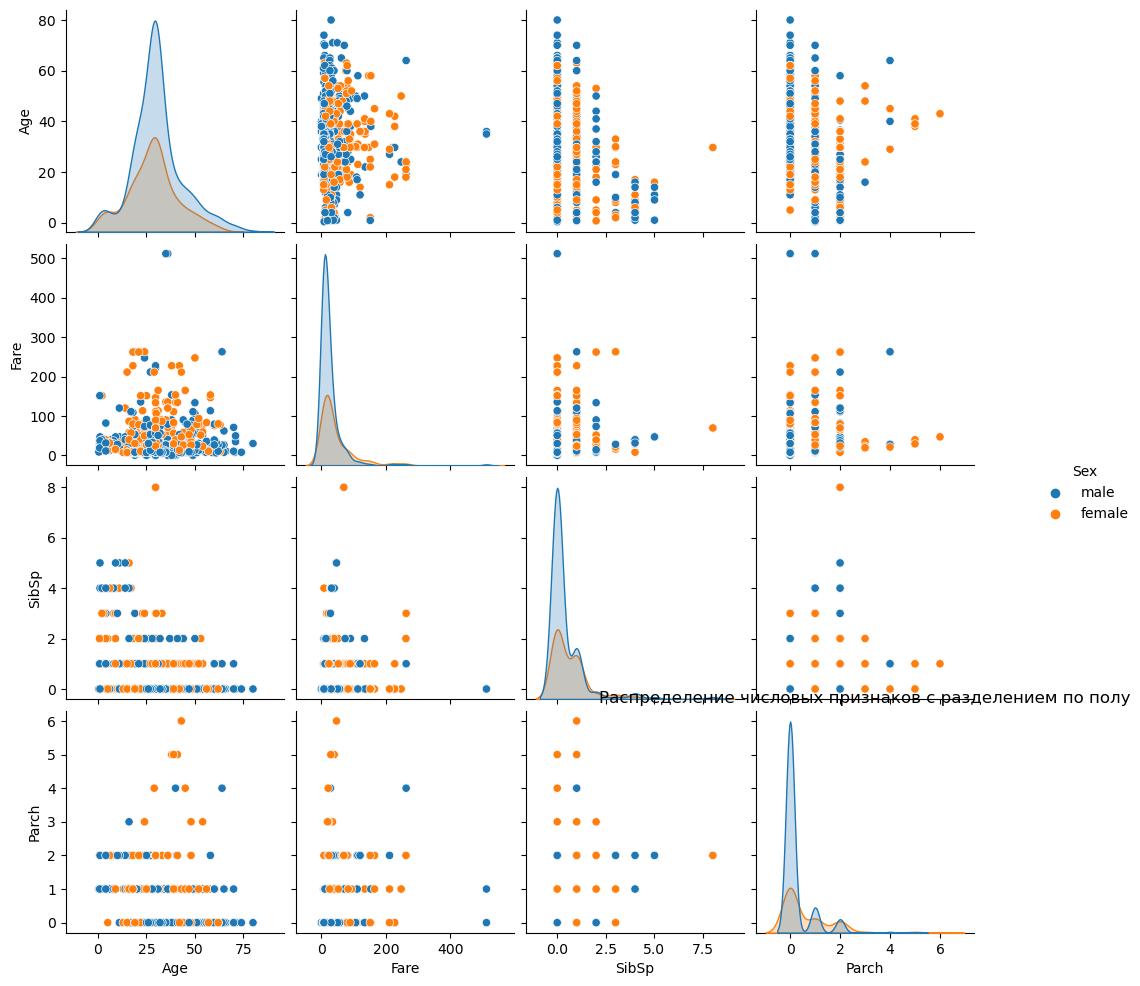

In [132]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Sex']], hue='Sex')
plt.title('Распределение числовых признаков с разделением по полу')
plt.show()

28. Постройте heatmap, который покажет частоту пересечений возраста и количества членов семьи (колонка SibSp). Дайте соответствующее название вашей heatmap

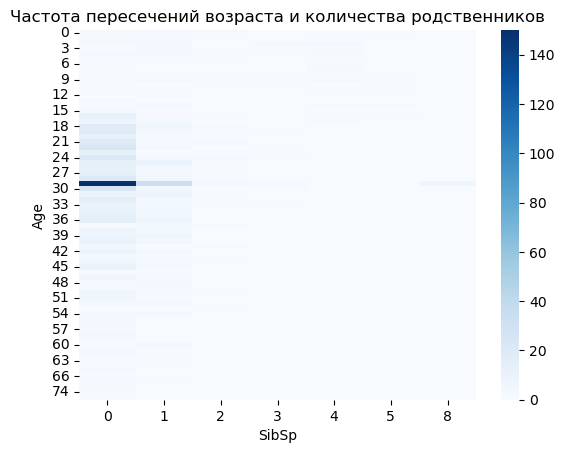

In [134]:
age_sibsp = pd.crosstab(df['Age'].dropna().astype(int), df['SibSp'])
sns.heatmap(age_sibsp, cmap='Blues')
plt.title('Частота пересечений возраста и количества родственников')
plt.show()

29. Постройте boxenplot, чтобы показать детализированное распределение стоимости билетов по полу и классу. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

F:\Anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

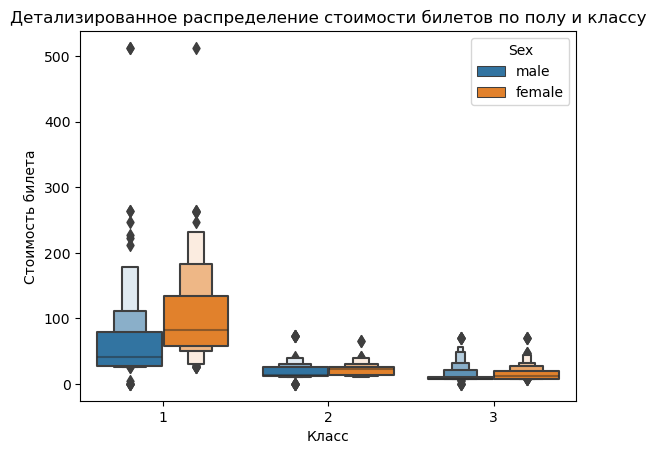

In [137]:
sns.boxenplot(x='Pclass', y='Fare', hue='Sex', data=df)
plt.title('Детализированное распределение стоимости билетов по полу и классу')
plt.xlabel('Класс')
plt.ylabel('Стоимость билета')
plt.show()


30. Постройте stripplot, чтобы визуализировать распределение возраста пассажиров по классам, а также добавьте разбивку по полу. Придумайте и выведите соответсвтующее название диагарммы, а также подпишите оси!

F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


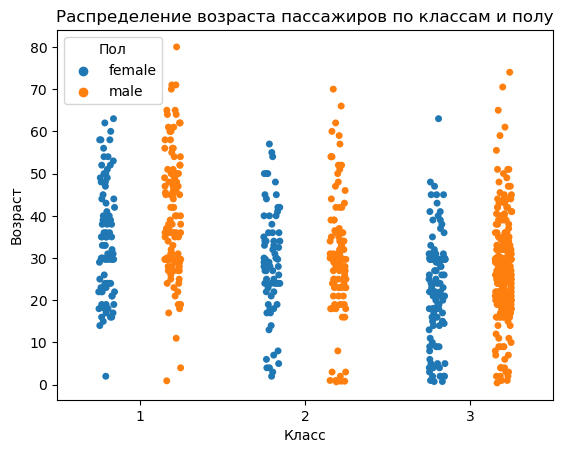

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение stripplot для отображения возраста пассажиров по классам с разбивкой по полу
sns.stripplot(x='Pclass', y='Age', hue='Sex', data=df, jitter=True, dodge=True)
plt.title('Распределение возраста пассажиров по классам и полу')
plt.xlabel('Класс')
plt.ylabel('Возраст')
plt.legend(title='Пол')
plt.show()